# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [14]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

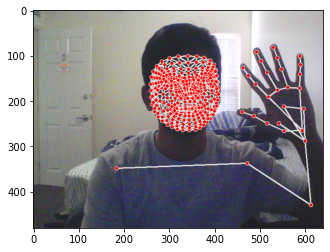

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.52658916,  0.38962528, -0.82005596, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
468*3+33*4+21*3+21*3

1662

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.52658916,  0.38962528, -0.82005596, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'peace'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [29]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [33]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [37]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(90, 30, 1662)

In [39]:
np.array(labels).shape

(90,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(90, 30, 1662)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [45]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [49]:
res = [.7, 0.2, 0.1]

In [50]:
actions[np.argmax(res)]

'hello'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 2s/step - loss: 2.4740 - categorical_accuracy: 0.2706
Epoch 2/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.2517 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 57ms/step - loss: 26.2570 - categorical_accuracy: 0.3176
Epoch 4/2000
3/3 [==============================] - 0s 55ms/step - loss: 24.1675 - categorical_accuracy: 0.3059
Epoch 5/2000
3/3 [==============================] - 0s 55ms/step - loss: 20.9390 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.2493 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 52ms/step - loss: 7.1523 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 54ms/step - loss: 11.4843 - categorical_accuracy: 0.3647
Epoch 9/2000
3/3 [==============================] - 0s 52ms/step - loss: 7.9550 - categorical_accuracy: 0.2824

3/3 [==============================] - 0s 56ms/step - loss: 29.3299 - categorical_accuracy: 0.2588
Epoch 74/2000
3/3 [==============================] - 0s 56ms/step - loss: 26.2844 - categorical_accuracy: 0.3765
Epoch 75/2000
3/3 [==============================] - 0s 52ms/step - loss: 27.8387 - categorical_accuracy: 0.3412
Epoch 76/2000
3/3 [==============================] - 0s 53ms/step - loss: 28.1367 - categorical_accuracy: 0.3176
Epoch 77/2000
3/3 [==============================] - 0s 52ms/step - loss: 26.9548 - categorical_accuracy: 0.3412
Epoch 78/2000
3/3 [==============================] - 0s 57ms/step - loss: 35.7297 - categorical_accuracy: 0.3529
Epoch 79/2000
3/3 [==============================] - 0s 55ms/step - loss: 27.1078 - categorical_accuracy: 0.2235
Epoch 80/2000
3/3 [==============================] - 0s 56ms/step - loss: 27.6686 - categorical_accuracy: 0.2824
Epoch 81/2000
3/3 [==============================] - 0s 56ms/step - loss: 67.4272 - categorical_accuracy: 0.34

3/3 [==============================] - 0s 55ms/step - loss: 1.3812 - categorical_accuracy: 0.3176
Epoch 146/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3471 - categorical_accuracy: 0.3529
Epoch 147/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.3668 - categorical_accuracy: 0.2941
Epoch 148/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.3287 - categorical_accuracy: 0.3412
Epoch 149/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.3397 - categorical_accuracy: 0.3176
Epoch 150/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.3332 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.3273 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.3119 - categorical_accuracy: 0.3412
Epoch 153/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3052 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 59ms/step - loss: 1.1326 - categorical_accuracy: 0.3529
Epoch 218/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0966 - categorical_accuracy: 0.2824
Epoch 219/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0864 - categorical_accuracy: 0.3647
Epoch 220/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0933 - categorical_accuracy: 0.3647
Epoch 221/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0987 - categorical_accuracy: 0.2706
Epoch 222/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0928 - categorical_accuracy: 0.3647
Epoch 223/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0882 - categorical_accuracy: 0.3647
Epoch 224/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1034 - categorical_accuracy: 0.3176
Epoch 225/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0938 - categorical_accuracy: 0.305

3/3 [==============================] - 0s 54ms/step - loss: 1.0883 - categorical_accuracy: 0.3882
Epoch 290/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0884 - categorical_accuracy: 0.3412
Epoch 291/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0907 - categorical_accuracy: 0.3647
Epoch 292/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1051 - categorical_accuracy: 0.2824
Epoch 293/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1222 - categorical_accuracy: 0.3647
Epoch 294/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0713 - categorical_accuracy: 0.4235
Epoch 295/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1379 - categorical_accuracy: 0.3294
Epoch 296/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1055 - categorical_accuracy: 0.3647
Epoch 297/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0857 - categorical_accuracy: 0.376

3/3 [==============================] - 0s 59ms/step - loss: 1.1081 - categorical_accuracy: 0.3059
Epoch 362/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0956 - categorical_accuracy: 0.3412
Epoch 363/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1012 - categorical_accuracy: 0.3647
Epoch 364/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1918 - categorical_accuracy: 0.2941
Epoch 365/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1622 - categorical_accuracy: 0.2941
Epoch 366/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1663 - categorical_accuracy: 0.3176
Epoch 367/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1336 - categorical_accuracy: 0.3059
Epoch 368/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1361 - categorical_accuracy: 0.3647
Epoch 369/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0913 - categorical_accuracy: 0.329

3/3 [==============================] - 0s 56ms/step - loss: 1.0915 - categorical_accuracy: 0.3412
Epoch 434/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0881 - categorical_accuracy: 0.3529
Epoch 435/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1173 - categorical_accuracy: 0.3294
Epoch 436/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1189 - categorical_accuracy: 0.3647
Epoch 437/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1306 - categorical_accuracy: 0.2941
Epoch 438/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0911 - categorical_accuracy: 0.3647
Epoch 439/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1175 - categorical_accuracy: 0.3647
Epoch 440/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1166 - categorical_accuracy: 0.3294
Epoch 441/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1117 - categorical_accuracy: 0.364

3/3 [==============================] - 0s 62ms/step - loss: 1.1517 - categorical_accuracy: 0.3176
Epoch 506/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1003 - categorical_accuracy: 0.3765
Epoch 507/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0860 - categorical_accuracy: 0.3647
Epoch 508/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1099 - categorical_accuracy: 0.3176
Epoch 509/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1339 - categorical_accuracy: 0.3176
Epoch 510/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0871 - categorical_accuracy: 0.3412
Epoch 511/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1248 - categorical_accuracy: 0.3176
Epoch 512/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1776 - categorical_accuracy: 0.2706
Epoch 513/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0880 - categorical_accuracy: 0.400

3/3 [==============================] - 0s 57ms/step - loss: 1.1617 - categorical_accuracy: 0.3176
Epoch 578/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.3303 - categorical_accuracy: 0.2706
Epoch 579/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1853 - categorical_accuracy: 0.3647
Epoch 580/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1578 - categorical_accuracy: 0.4235
Epoch 581/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1429 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1730 - categorical_accuracy: 0.4000
Epoch 583/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1618 - categorical_accuracy: 0.2824
Epoch 584/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1137 - categorical_accuracy: 0.3647
Epoch 585/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1022 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 58ms/step - loss: 1.1156 - categorical_accuracy: 0.4000
Epoch 650/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.2007 - categorical_accuracy: 0.2941
Epoch 651/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1729 - categorical_accuracy: 0.2706
Epoch 652/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0938 - categorical_accuracy: 0.3765
Epoch 653/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1269 - categorical_accuracy: 0.2706
Epoch 654/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0889 - categorical_accuracy: 0.3529
Epoch 655/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0900 - categorical_accuracy: 0.4000
Epoch 656/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1122 - categorical_accuracy: 0.3412
Epoch 657/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1533 - categorical_accuracy: 0.364

3/3 [==============================] - 0s 57ms/step - loss: 1.0948 - categorical_accuracy: 0.3647
Epoch 722/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1546 - categorical_accuracy: 0.3176
Epoch 723/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1508 - categorical_accuracy: 0.3176
Epoch 724/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1131 - categorical_accuracy: 0.3176
Epoch 725/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0953 - categorical_accuracy: 0.3176
Epoch 726/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1043 - categorical_accuracy: 0.3529
Epoch 727/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1768 - categorical_accuracy: 0.3647
Epoch 728/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1431 - categorical_accuracy: 0.3294
Epoch 729/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.1342 - categorical_accuracy: 0.364

3/3 [==============================] - 0s 54ms/step - loss: 1.1055 - categorical_accuracy: 0.3647
Epoch 794/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0770 - categorical_accuracy: 0.4000
Epoch 795/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.1271 - categorical_accuracy: 0.2471
Epoch 796/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.1173 - categorical_accuracy: 0.3647
Epoch 797/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1034 - categorical_accuracy: 0.3059
Epoch 798/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1261 - categorical_accuracy: 0.3647
Epoch 799/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1026 - categorical_accuracy: 0.3176
Epoch 800/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0887 - categorical_accuracy: 0.3412
Epoch 801/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1201 - categorical_accuracy: 0.364

3/3 [==============================] - 0s 56ms/step - loss: 1.1201 - categorical_accuracy: 0.3412
Epoch 866/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1141 - categorical_accuracy: 0.3882
Epoch 867/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0818 - categorical_accuracy: 0.4000
Epoch 868/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0995 - categorical_accuracy: 0.3294
Epoch 869/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1912 - categorical_accuracy: 0.3529
Epoch 870/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1115 - categorical_accuracy: 0.3882
Epoch 871/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1779 - categorical_accuracy: 0.3176
Epoch 872/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1193 - categorical_accuracy: 0.3529
Epoch 873/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1212 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 55ms/step - loss: 1.1084 - categorical_accuracy: 0.3529
Epoch 938/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0927 - categorical_accuracy: 0.3529
Epoch 939/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1109 - categorical_accuracy: 0.3176
Epoch 940/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.1052 - categorical_accuracy: 0.3176
Epoch 941/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1010 - categorical_accuracy: 0.3412
Epoch 942/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1094 - categorical_accuracy: 0.3412
Epoch 943/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0974 - categorical_accuracy: 0.3529
Epoch 944/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0961 - categorical_accuracy: 0.3529
Epoch 945/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0977 - categorical_accuracy: 0.305

3/3 [==============================] - 0s 57ms/step - loss: 1.0954 - categorical_accuracy: 0.3529
Epoch 1010/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0998 - categorical_accuracy: 0.2824
Epoch 1011/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1043 - categorical_accuracy: 0.3176
Epoch 1012/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0933 - categorical_accuracy: 0.3647
Epoch 1013/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1053 - categorical_accuracy: 0.3529
Epoch 1014/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0969 - categorical_accuracy: 0.3412
Epoch 1015/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0992 - categorical_accuracy: 0.3294
Epoch 1016/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1054 - categorical_accuracy: 0.3647
Epoch 1017/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0958 - categorical_accurac

3/3 [==============================] - 0s 55ms/step - loss: 1.0906 - categorical_accuracy: 0.3294
Epoch 1082/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0838 - categorical_accuracy: 0.3294
Epoch 1083/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0856 - categorical_accuracy: 0.3647
Epoch 1084/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0852 - categorical_accuracy: 0.3647
Epoch 1085/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0818 - categorical_accuracy: 0.3529
Epoch 1086/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0881 - categorical_accuracy: 0.4000
Epoch 1087/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0853 - categorical_accuracy: 0.3294
Epoch 1088/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0817 - categorical_accuracy: 0.3765
Epoch 1089/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0819 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 1.0868 - categorical_accuracy: 0.2706
Epoch 1154/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0781 - categorical_accuracy: 0.3294
Epoch 1155/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0782 - categorical_accuracy: 0.3647
Epoch 1156/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0823 - categorical_accuracy: 0.3647
Epoch 1157/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0783 - categorical_accuracy: 0.4000
Epoch 1158/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0825 - categorical_accuracy: 0.3059
Epoch 1159/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0824 - categorical_accuracy: 0.3647
Epoch 1160/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0775 - categorical_accuracy: 0.4000
Epoch 1161/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0857 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 1.0818 - categorical_accuracy: 0.3412
Epoch 1226/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0793 - categorical_accuracy: 0.3059
Epoch 1227/2000
3/3 [==============================] - 0s 50ms/step - loss: 1.0795 - categorical_accuracy: 0.3647
Epoch 1228/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0779 - categorical_accuracy: 0.3647
Epoch 1229/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0833 - categorical_accuracy: 0.3176
Epoch 1230/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0736 - categorical_accuracy: 0.4706
Epoch 1231/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0819 - categorical_accuracy: 0.3647
Epoch 1232/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0817 - categorical_accuracy: 0.3647
Epoch 1233/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0819 - categorical_accurac

Epoch 1297/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0806 - categorical_accuracy: 0.4000
Epoch 1298/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0745 - categorical_accuracy: 0.3412
Epoch 1299/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0782 - categorical_accuracy: 0.3647
Epoch 1300/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0761 - categorical_accuracy: 0.3882
Epoch 1301/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0759 - categorical_accuracy: 0.3529
Epoch 1302/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0759 - categorical_accuracy: 0.3412
Epoch 1303/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0798 - categorical_accuracy: 0.4235
Epoch 1304/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0737 - categorical_accuracy: 0.3176
Epoch 1305/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0755 - cat

3/3 [==============================] - 0s 58ms/step - loss: 1.0782 - categorical_accuracy: 0.3529
Epoch 1369/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0801 - categorical_accuracy: 0.3647
Epoch 1370/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0714 - categorical_accuracy: 0.3412
Epoch 1371/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0746 - categorical_accuracy: 0.3412
Epoch 1372/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0804 - categorical_accuracy: 0.3765
Epoch 1373/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0762 - categorical_accuracy: 0.4000
Epoch 1374/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0731 - categorical_accuracy: 0.4471
Epoch 1375/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0734 - categorical_accuracy: 0.3647
Epoch 1376/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0732 - categorical_accurac

Epoch 1440/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0751 - categorical_accuracy: 0.4706
Epoch 1441/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0741 - categorical_accuracy: 0.4235
Epoch 1442/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0727 - categorical_accuracy: 0.4706
Epoch 1443/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0766 - categorical_accuracy: 0.2824
Epoch 1444/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0749 - categorical_accuracy: 0.4471
Epoch 1445/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0747 - categorical_accuracy: 0.3647
Epoch 1446/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0926 - categorical_accuracy: 0.2706
Epoch 1447/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0798 - categorical_accuracy: 0.3059
Epoch 1448/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0687 - cat

3/3 [==============================] - 0s 58ms/step - loss: 1.0719 - categorical_accuracy: 0.3647
Epoch 1512/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0720 - categorical_accuracy: 0.3647
Epoch 1513/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1199 - categorical_accuracy: 0.4000
Epoch 1514/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0684 - categorical_accuracy: 0.3765
Epoch 1515/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0722 - categorical_accuracy: 0.3647
Epoch 1516/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0725 - categorical_accuracy: 0.3647
Epoch 1517/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0680 - categorical_accuracy: 0.3765
Epoch 1518/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0851 - categorical_accuracy: 0.3294
Epoch 1519/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0859 - categorical_accurac

Epoch 1583/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0677 - categorical_accuracy: 0.4000
Epoch 1584/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0669 - categorical_accuracy: 0.4588
Epoch 1585/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0678 - categorical_accuracy: 0.4588
Epoch 1586/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0687 - categorical_accuracy: 0.4353
Epoch 1587/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0711 - categorical_accuracy: 0.4353
Epoch 1588/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0685 - categorical_accuracy: 0.4000
Epoch 1589/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0668 - categorical_accuracy: 0.4000
Epoch 1590/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0675 - categorical_accuracy: 0.3765
Epoch 1591/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0796 - cat

3/3 [==============================] - 0s 57ms/step - loss: 1.0713 - categorical_accuracy: 0.4235
Epoch 1655/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0677 - categorical_accuracy: 0.4471
Epoch 1656/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0671 - categorical_accuracy: 0.4471
Epoch 1657/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0665 - categorical_accuracy: 0.3294
Epoch 1658/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0654 - categorical_accuracy: 0.4000
Epoch 1659/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0648 - categorical_accuracy: 0.4118
Epoch 1660/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0632 - categorical_accuracy: 0.4235
Epoch 1661/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0630 - categorical_accuracy: 0.4941
Epoch 1662/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0653 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 1.0428 - categorical_accuracy: 0.4824
Epoch 1727/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0382 - categorical_accuracy: 0.4588
Epoch 1728/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0367 - categorical_accuracy: 0.4941
Epoch 1729/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0489 - categorical_accuracy: 0.4353
Epoch 1730/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0358 - categorical_accuracy: 0.4588
Epoch 1731/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0388 - categorical_accuracy: 0.4235
Epoch 1732/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0494 - categorical_accuracy: 0.4000
Epoch 1733/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0714 - categorical_accuracy: 0.3294
Epoch 1734/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0708 - categorical_accurac

3/3 [==============================] - 0s 54ms/step - loss: 1.0891 - categorical_accuracy: 0.3294
Epoch 1799/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0569 - categorical_accuracy: 0.4588
Epoch 1800/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.0254 - categorical_accuracy: 0.4941
Epoch 1801/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0299 - categorical_accuracy: 0.4000
Epoch 1802/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0261 - categorical_accuracy: 0.5176
Epoch 1803/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0040 - categorical_accuracy: 0.5529
Epoch 1804/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0201 - categorical_accuracy: 0.4824
Epoch 1805/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.0130 - categorical_accuracy: 0.4588
Epoch 1806/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9962 - categorical_accurac

Epoch 1870/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9610 - categorical_accuracy: 0.5294
Epoch 1871/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9513 - categorical_accuracy: 0.5412
Epoch 1872/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9581 - categorical_accuracy: 0.5529
Epoch 1873/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9502 - categorical_accuracy: 0.5412
Epoch 1874/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9867 - categorical_accuracy: 0.4941
Epoch 1875/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9912 - categorical_accuracy: 0.4941
Epoch 1876/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0216 - categorical_accuracy: 0.5176
Epoch 1877/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9431 - categorical_accuracy: 0.5529
Epoch 1878/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9744 - cat

3/3 [==============================] - 0s 56ms/step - loss: 0.9801 - categorical_accuracy: 0.5176
Epoch 1942/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9096 - categorical_accuracy: 0.5647
Epoch 1943/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0176 - categorical_accuracy: 0.4000
Epoch 1944/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9661 - categorical_accuracy: 0.5294
Epoch 1945/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9564 - categorical_accuracy: 0.5529
Epoch 1946/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9353 - categorical_accuracy: 0.5294
Epoch 1947/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9312 - categorical_accuracy: 0.5412
Epoch 1948/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9439 - categorical_accuracy: 0.5294
Epoch 1949/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9495 - categorical_accurac

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [54]:
res = model.predict(X_test)

In [55]:
actions[np.argmax(res[4])]

'thanks'

In [56]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [57]:
model.save('action.h5')

In [217]:
# del model

In [15]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [58]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [59]:
yhat = model.predict(X_test)

In [60]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [61]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 1],
        [0, 0]],

       [[2, 0],
        [1, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [62]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [63]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [64]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [65]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [66]:
len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [67]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_bas

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.Sol

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)